In [1]:
import pandas as pd
import os

In [2]:
num=list(set([name.split('_')[1] for name in os.listdir('./raw_data')]))

In [3]:
num

['152618', '172906', '190039']

In [4]:
list_path = []
for number in num:
    file_list = [name for name in os.listdir('./raw_data/') if number in name]
    sorted_list = sorted(file_list, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    list_path.append(sorted_list)
list_path[0][0], list_path[1][0]

('20230822_152618_982_1.csv', '20230822_172906_128_1.csv')

In [5]:
raw_data = [pd.read_csv(f'./raw_data/{name}', low_memory=True,skiprows=8) for name in list_path[0]] # 1528
raw_data_1 = [pd.read_csv(f'./raw_data/{name}', low_memory=True,skiprows=8) for name in list_path[1]] 

In [ ]:
raw_data = pd.concat(raw_data,axis=0,ignore_index=True)
raw_data_1 = pd.concat(raw_data_1,axis=0)

In [ ]:
def diff_count(df: pd.DataFrame):
    temp =pd.DataFrame()
        # 'Timestamps' 열을 datetime 형태로 변환
    temp['Timestamps'] = pd.to_datetime(df['Time'])

    # 연속된 두 timestamp 간의 차이를 계산하여 새로운 열 'Time Difference'에 저장
    temp['Time Difference'] = temp['Timestamps'].diff()

    # value_counts() 실행
    count = temp['Time Difference'].value_counts()
    
    return count[count.index>pd.Timedelta('1.5s')]

In [ ]:
print(diff_count(raw_data))
print(diff_count(raw_data_1))

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [ ]:
import librosa
import numpy as np
raw_data['Time'][5000], raw_data['Time'][15000] # 10000HZ


('2023.08.22 15:26:19.490', '2023.08.22 15:26:20.488')

In [ ]:
raw_data['x'].plot()

In [76]:
hz=10000
num = int(len(raw_data)/hz)
s = 20
image_list = []
for i in range(0,num-0,s):
    S = librosa.feature.melspectrogram(y=raw_data['x'].iloc[i*hz:(i+s)*hz].to_numpy(), n_mels=64, n_fft=512,sr=hz,hop_length=256)
    S_dB = librosa.power_to_db(S, ref=np.max)
    image_list.append(S_dB)
print(len(image_list))

369


(64, 782)
(64, 782)
(64, 782)
(64, 782)
(64, 782)
(64, 570)
(64, 570)


<Figure size 1000x400 with 0 Axes>

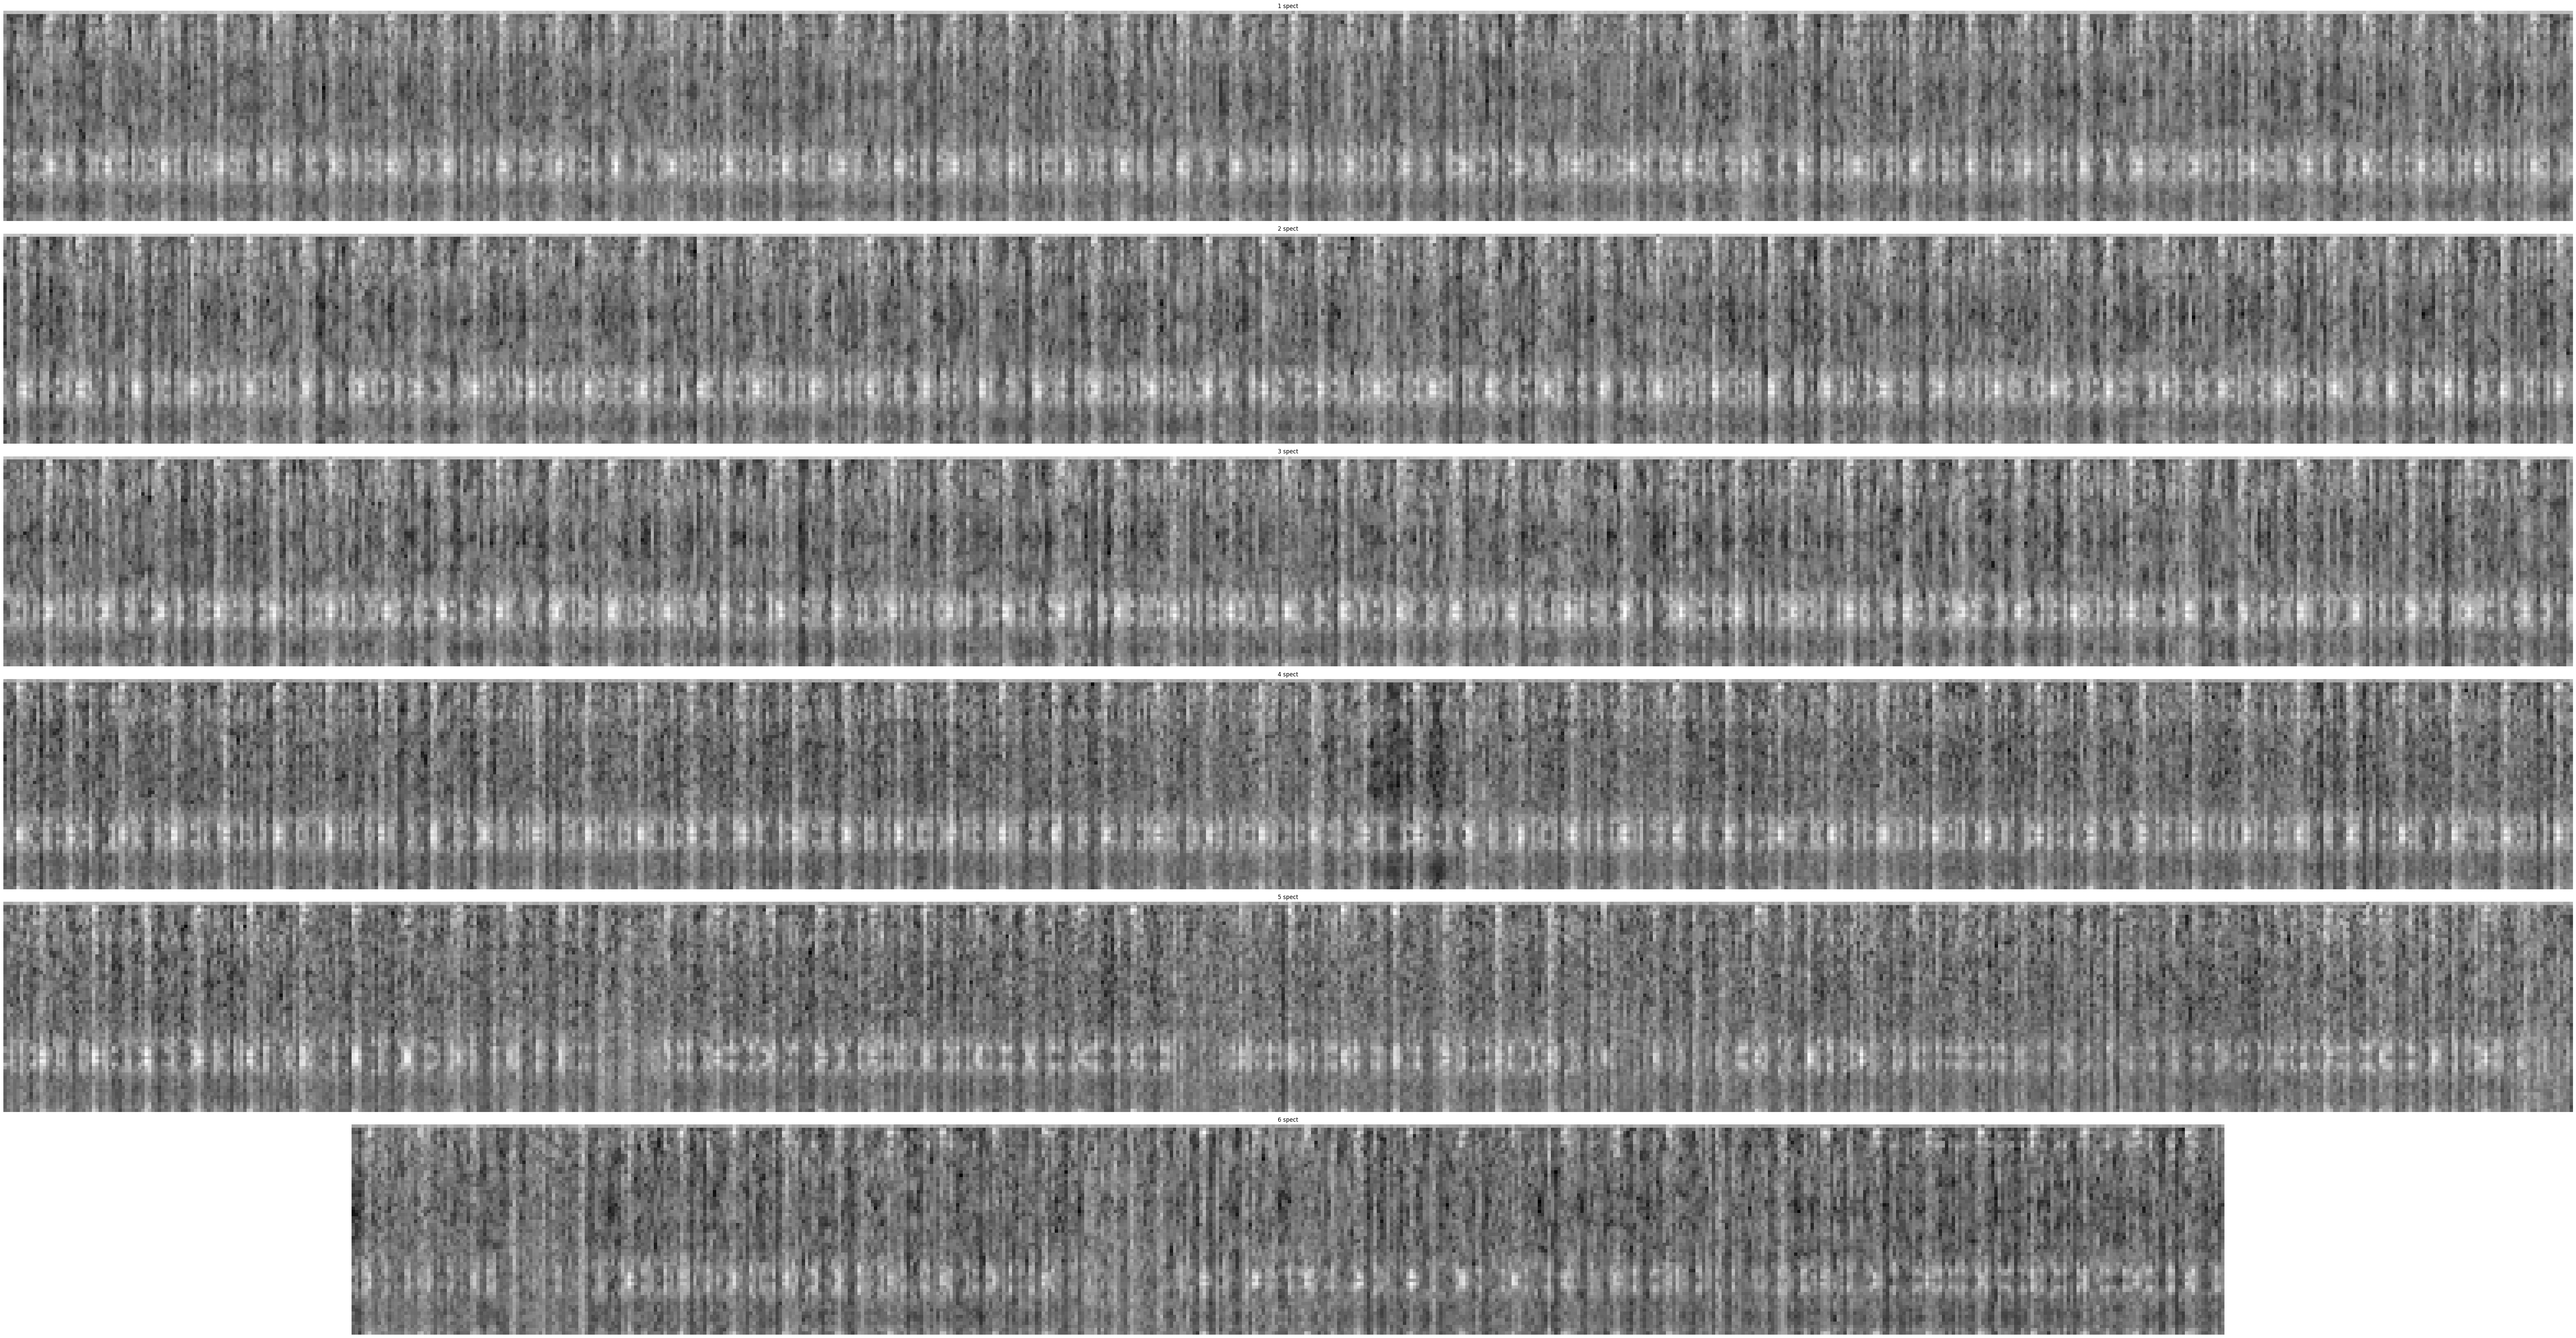

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
new_image_list = [image_list[0],image_list[1],image_list[2],image_list[-3],image_list[-2],image_list[-1]]
n=len(new_image_list)
fig, axes = plt.subplots(n,1, figsize=(80, 40))
for i,(ax, image) in enumerate(zip(axes, new_image_list)):
    # 이미지 로드
    print(image.shape)
    # 이미지 표시
    ax.imshow(image,cmap='gray')
    ax.axis('off')  # 축 정보 숨기기
    ax.set_title(f'{i+1} spect')  # 이미지 파일 이름을 제목으로 설정

print(image.shape)
plt.tight_layout();
plt.show();